In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from pathlib import Path
import os
from model_utils import train_classifier, plot_report, compare_train_test_performance
from fastai.tabular.all import *

In [3]:
data_path = Path("./data/matched_w_features/")

test_data = gpd.read_parquet(data_path/"test_data.parquet")
test_info = test_data.iloc[:,:20]
test_features = test_data.iloc[:,20:]

In [5]:
learn = load_learner("./models/deadwood_model.pkl")

In [6]:
test_dl = learn.dls.test_dl(test_features)

                precision    recall  f1-score   support

         Birch       0.46      0.62      0.52       188
European aspen       0.81      0.70      0.75       281
 Norway spruce       0.54      0.45      0.49       284
    Scots pine       0.77      0.83      0.80       527
      deadwood       0.50      0.25      0.33        48

      accuracy                           0.67      1328
     macro avg       0.62      0.57      0.58      1328
  weighted avg       0.68      0.67      0.67      1328

Cohen's kappa: 0.55
Matthews correlation coefficient: 0.55


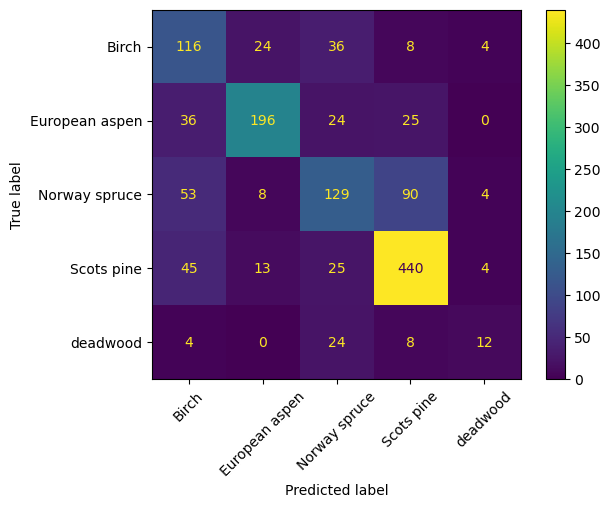

In [7]:
prob, _ = learn.get_preds(dl = test_dl)
y_hat = pd.Series(test_dl.vocab[np.argmax(prob, axis = 1)])
plot_report(test_info.species, y_hat)